In [135]:
from cgitb import text
from types import new_class
import requests
from bs4 import BeautifulSoup
import json
import re
import sys
import time, random
import pandas as pd

import pymysql
conn = pymysql.connect(host='localhost',
                       port=3306,
                       user='root',
                       passwd='1234',
                       db='wordcloud')


In [136]:
header = {
    'User-Agent' : 'Mozilla/5.0 (Window NT 10.0; Win64; x64) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

In [137]:
def get_news(news_url):
    news_detail = []
    print(news_url)
    req = requests.get(news_url, headers=header)
    soup = BeautifulSoup(req.content, 'html.parser')

    _text = soup.select('.view-cont')[0].get_text().replace('\n', " ")
    text = _text.replace("// flahs 오류를 우회하기 위함 함수 추가 function _flash_removeCallback() {}", "" )
    news_detail.append(text.strip())

    return news_detail

In [138]:
news1 = get_news('https://www.korea.kr/news/policyNewsView.do?newsId=148901469')
print(news1)

https://www.korea.kr/news/policyNewsView.do?newsId=148901469
['존경하고 사랑하는 국민 여러분, \r 750만 재외동포 여러분,그리고 자유를 사랑하는 세계 시민 여러분, 저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고, 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다. 역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다. 문재인, 박근혜 전 대통령, 그리고 할리마 야콥 싱가포르 대통령, 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령, 왕치산 중국 국가부주석, 메가와티 수카르노푸트리 인도네시아 전 대통령, 더글러스 엠호프 해리스 미국 부통령 부군, 조지 퓨리 캐나다 상원의장, 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다. 이 자리를 빌려 지난 2년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.그리고 헌신해주신 의료진 여러분께도 감사드립니다. 존경하는 국민 여러분,세계 시민 여러분, 지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편, 기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로,\xa0 또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다. 다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다. 또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업, 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다. 한편, 이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다. 가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다. 견해가 다른 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다. 그것이

In [158]:
cur = conn.cursor() 
cur.execute("DELETE FROM `news`")
cur.execute('INSERT INTO news VALUES(%s)', news1[0])
cur.execute("SELECT * FROM news")
news2 = cur.fetchall()
conn.commit()

In [140]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taemin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [162]:
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

news3 = []
news3.append(hannanum.nouns(news2[0][0]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(news3)
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(10) 


자유     29
여러분    16
시민     15
국민     15
우리     14
세계     13
평화     10
해결      9
가치      7
존경      7
dtype: int64

In [163]:
import os
java_home = os.environ.get('JAVA_HOME', None)
if not java_home:
    os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/jdk-16.0.2.jdk/Contents/Home/bin'
else:
    print(java_home)

Library/Java/JavaVirtualMachines/jdk-16.0.2.jdk/


In [164]:
from wordcloud import WordCloud
from collections import Counter

font_path = '/Users/taemin/Library/Fonts/AppleSDGothicNeo.ttc'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white"
)

In [167]:
count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)

In [168]:
array=wordcloud.to_array()

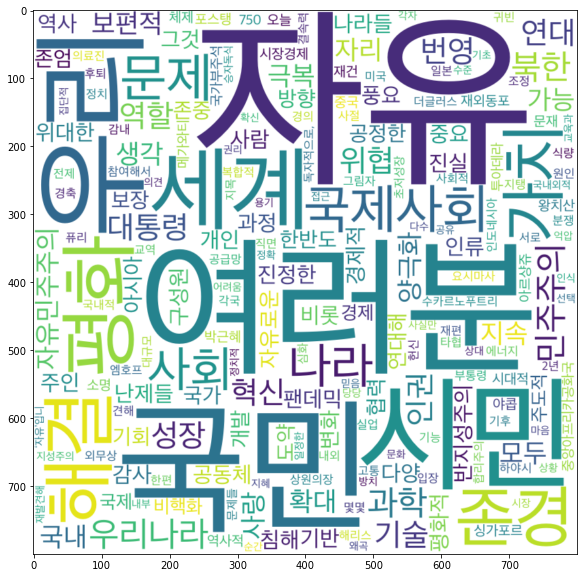

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')